<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/tip_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
# https://www.kaggle.com/datasets/jsphyg/tipping

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [224]:
od.download("https://www.kaggle.com/datasets/jsphyg/tipping")

Skipping, found downloaded files in "./tipping" (use force=True to force download)


In [225]:
df = pd.read_csv("tipping/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


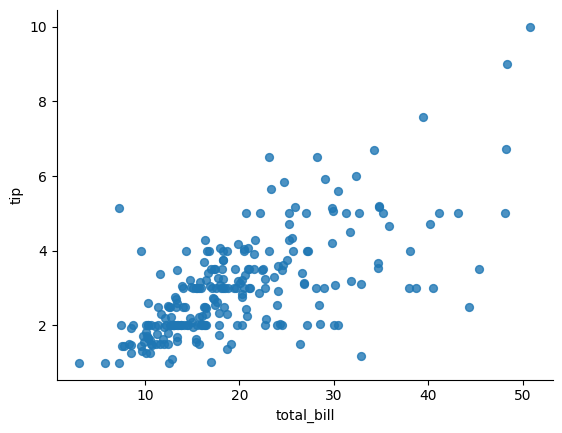

In [226]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [227]:
df.isnull().sum()
# df['day'] = df['day'].replace({"Sat":0,"Sun":1,"Thur":2,"Fri":3})

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [228]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'time', 'day'], drop_first=True)
df_encoded

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,False,False,False,False,True,False
1,10.34,1.66,3,True,False,False,False,True,False
2,21.01,3.50,3,True,False,False,False,True,False
3,23.68,3.31,2,True,False,False,False,True,False
4,24.59,3.61,4,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,False,True,False,False
240,27.18,2.00,2,False,True,False,True,False,False
241,22.67,2.00,2,True,True,False,True,False,False
242,17.82,1.75,2,True,False,False,True,False,False


In [229]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [230]:
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [232]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.31471131, -0.60019263, -1.34335316, ..., -0.74440589,
         1.48678388, -0.5836603 ],
       [-1.06323531,  0.45338292,  0.74440589, ..., -0.74440589,
         1.48678388, -0.5836603 ],
       [ 0.1377799 ,  0.45338292,  0.74440589, ..., -0.74440589,
         1.48678388, -0.5836603 ],
       ...,
       [ 0.3246295 , -0.60019263,  0.74440589, ...,  1.34335316,
        -0.67259271, -0.5836603 ],
       [-0.2212865 , -0.60019263,  0.74440589, ...,  1.34335316,
        -0.67259271, -0.5836603 ],
       [-0.1132289 , -0.60019263, -1.34335316, ..., -0.74440589,
        -0.67259271,  1.71332538]])

In [233]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [235]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [236]:
y_pred = model.predict(x_test)

In [237]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Average error: {mse}")
print(f"R2 score: {r2}")

Average error: 0.8452205296494986
R2 score: 0.3337600470935709


In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

In [239]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, min_samples_leaf=1, random_state=42)

scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')

# 3. View the results
print(f"Scores for each fold: {scores}")
print(f"Average R2 Score: {scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {scores.std():.4f}")

rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Average error: {mape}")

r2 =  r2_score(y_test, rf_pred)

print(f"R2 score: {r2}")

Scores for each fold: [0.44692419 0.57209005 0.49566498 0.34478434 0.41309085]
Average R2 Score: 45.45%
Standard Deviation: 0.0766
Average error: 0.3219698089853149
R2 score: 0.33250942235755665


In [240]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "Menu" of options to try
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 3, 5]
}

# 2. Set up the search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')

# 3. Let it find the best settings
grid_search.fit(X_scaled, y)

print(f"Best Settings: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_ * 100:.2f}%")

Best Settings: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100}
Best R2 Score: 45.45%


In [241]:
"""
Average error: 0.8452205296494986
R2 score: 0.3337600470935709

Average error: 0.30757146439209376
R2 score: 0.25956651430110156


"""

'\nAverage error: 0.8452205296494986\nR2 score: 0.3337600470935709\n\nAverage error: 0.30757146439209376\nR2 score: 0.25956651430110156\n\n\n'

/tmp/ipython-input-1225348300.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


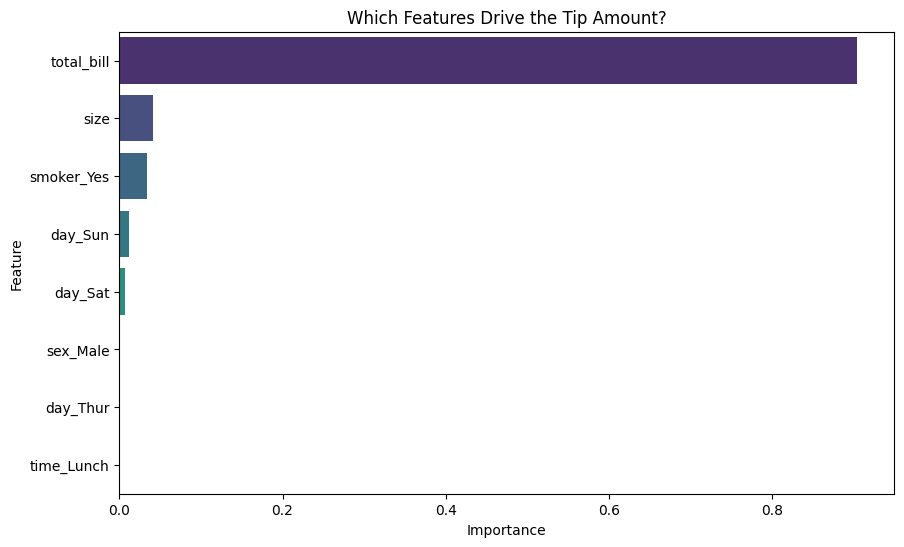

In [242]:
# 1. Get the best model from your grid search
best_rf = grid_search.best_estimator_

# 2. Extract importances
importances = best_rf.feature_importances_
feature_names = X.columns # Use the names from your encoded dataframe

# 3. Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Features Drive the Tip Amount?')
plt.show()

In [243]:
from sklearn.ensemble import GradientBoostingRegressor

# Boosting is often more accurate than Random Forest on small tabular data
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)

rf_pred = gb_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Average error: {mape}")

r2 =  r2_score(y_test, rf_pred)

print(f"R2 score: {r2}")

Average error: 0.28514390850620386
R2 score: 0.36814348945086095


In [244]:
df_clean = df[(df['tip'] <= 7) & (df['total_bill'] <= 45)]

df_encoded_clean = pd.get_dummies(df_clean, drop_first=True)
X_clean = df_encoded_clean.drop('tip', axis=1)
y_clean = df_encoded_clean['tip']

x_train, x_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.8,
    random_state=42
)

gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)

print(f"New R2 Score: {r2_score(y_test, gb_pred) * 100:.2f}%")
print(f"New Average Error (MAPE): {mean_absolute_percentage_error(y_test, gb_pred) * 100:.2f}%")

New R2 Score: 45.84%
New Average Error (MAPE): 26.30%


In [245]:
from sklearn.metrics import mean_squared_error

train_pred = gb_model.predict(x_train)
test_pred = gb_model.predict(x_test)

train_mape = mean_absolute_percentage_error(y_train, train_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("--- TRAINING RESULTS ---")
print(f"Training Error (MAPE): {train_mape * 100:.2f}%")
print(f"Training R2 Score: {train_r2 * 100:.2f}%")

print("\n--- VALIDATION (TEST) RESULTS ---")
print(f"Validation Error (MAPE): {test_mape * 100:.2f}%")
print(f"Validation R2 Score: {test_r2 * 100:.2f}%")

--- TRAINING RESULTS ---
Training Error (MAPE): 23.28%
Training R2 Score: 59.41%

--- VALIDATION (TEST) RESULTS ---
Validation Error (MAPE): 26.30%
Validation R2 Score: 45.84%
